<a href="https://colab.research.google.com/github/albertos-2002/SF3/blob/main/elettronica/esperienza_5/Esperienza_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import math
import matplotlib.pyplot as plt
import numpy as np

regrlin_pear_errpost_xys(input_x, input_y, input_sigma)

retta_fit_xba(x, b,a)

chi_quadro_lineare(y_vec, x_vec, sigma_vec, inte, pend, stringa_ytitle)

#Librerie

In [ ]:
def regrlin_pear_errpost_xys(input_x, input_y, input_sigma) :
  import math
  import sys
  #dati input
  x = list(input_x)
  y = list(input_y)
  sigma = list(input_sigma)
  dimensione = len(x)
  if len(x) != len(y):
    print("X E Y DIMENSIONE DIVERSA")
    sys.exit()
  if len(x) != len(sigma):
    print("X E SIGMA DIMENSIONE DIVERSA")
    sys.exit()
  #REGRESSIOBNE LINEARE
  #calcolo del delta
  parametro_1 = 0
  parametro_2 = 0
  parametro_3 = 0
  for i in range(dimensione): #primo termine del delta
    dummy_1 = 0
    dummy_1 = 1/ pow(sigma[i],2)
    parametro_1 = dummy_1 + parametro_1
  for i in range(dimensione): #secondo termine del delta
    dummy_2 = 0
    dummy_2 = pow(x[i],2) / pow(sigma[i],2)
    parametro_2 = dummy_2 + parametro_2
  dummy_3_1 = 0
  for i in range(dimensione): #terzo termine del delta
    dummy_3 = 0
    dummy_3 = x[i] / pow(sigma[i],2)
    dummy_3_1 = dummy_3 + dummy_3_1
  parametro_3 = pow(dummy_3_1,2)
  delta = (parametro_1*parametro_2) - parametro_3
  delta_1 = 1/delta
  #calcolo di b
  parametro_4 = 0
  parametro_5 = 0
  parametro_6 = 0
  parametro_7 = 0
  for i in range(dimensione): #calcolo del primo termine di a
    dummy_4 = 0
    dummy_4 = 1/pow(sigma[i],2)
    parametro_4 = dummy_4 + parametro_4
  for i in range(dimensione): #calcolo del secondo termine di a
    dummy_5 = 0
    dummy_5 = (x[i]*y[i]) / pow(sigma[i],2)
    parametro_5 = dummy_5 + parametro_5
  for i in range(dimensione): #calcolo del terzo termine di a
    dummy_6 = 0
    dummy_6 = x[i] / pow(sigma[i],2)
    parametro_6 = dummy_6 + parametro_6
  for i in range(dimensione): #calcolo del quarto termine di a
    dummy_7 = 0
    dummy_7 = y[i] / pow(sigma[i],2)
    parametro_7 = dummy_7 + parametro_7
  dummy_b1 = delta_1*parametro_4*parametro_5
  dummy_b2 = delta_1*parametro_6*parametro_7
  b = dummy_b1-dummy_b2
	#calcolo di a
  parametro_8 = parametro_2
  parametro_9 = parametro_7
  parametro_10 = parametro_6
  parametro_11 = parametro_5
  dummy_a1 = delta_1*parametro_8*parametro_9
  dummy_a2 = delta_1*parametro_10*parametro_11
  a = dummy_a1-dummy_a2
  #calcolo incertezza e covarianza
  #sigma b
  sigma_b = math.sqrt(delta_1*parametro_1)
  #sigma a
  sigma_a = math.sqrt(delta_1*parametro_8)
  #covrianza
  #al mmento non disponibile
  #COEFFICIENTE DI CORRELLAZIONE DI PEARSON
  media_x = sum(x) / dimensione
  media_y = sum(y) / dimensione
  numeratore = 0
  denominatore = 0
  dummy_denx = 0
  dummy_deny = 0
  for i in range(dimensione):
    dummy_x = x[i]-media_x
    dummy_y = y[i]-media_y
    dummy_numeratore = dummy_x*dummy_y
    numeratore = dummy_numeratore + numeratore
    dummy_x2 = pow(dummy_x,2)
    dummy_y2 = pow(dummy_y,2)
    dummy_denx = dummy_x2 + dummy_denx
    dummy_deny = dummy_y2 + dummy_deny
  dummy_denominatore = dummy_denx * dummy_deny
  denominatore = math.sqrt(dummy_denominatore)
  rxy = numeratore / denominatore
  numeratore_sigma = 1 - pow(rxy,2)
  denominatore_sigma = dimensione - 2
  sigma_rxy = math.sqrt(numeratore_sigma/denominatore_sigma)
  #ERRORE A POSTERIORI
  parametro_12 = 1 / (dimensione - 2)
  y_riferimento = []
  for i in range(dimensione):
    dummy_y = 0
    dummy_y = a + (b*x[i])
    y_riferimento.append(dummy_y)
  scarti_quadrati = 0
  for i in range(dimensione):
    dummy_sq = y[i] - y_riferimento[i]
    dummy_sq2 = pow(dummy_sq,2)
    scarti_quadrati = dummy_sq2 + scarti_quadrati
  errore_posteriori = math.sqrt(parametro_12*scarti_quadrati)
  #print dei risultati
  print("pendenza $b$\t", b)
  print("$\sigma_b$\t", sigma_b)
  print("intercetta $a$\t", a)
  print("$\sigma_a$\t", sigma_a)
  #print("covarianza", )
  print("Coefficiente di Pearson $\\rho_{xy}$\t",  rxy)
  print("$\sigma_{\\rho_{xy}}$\t", sigma_rxy)
  print("Errore a posteriori $\delta$\t",  errore_posteriori)

In [ ]:
def retta_fit_xba(x, b,a):
  y = []
  for i in range(len(x)):
    dummy = 0
    dummy = (x[i]*b) + a
    y.append(dummy)
  return y

In [ ]:
def chi_quadro_lineare(y_vec, x_vec, sigma_vec, inte, pend, stringa_ytitle):

	import math
	import matplotlib.pyplot as plt

#La formula della retta utilizzata è: y = a + bx
#dati
	y = list(y_vec)
	x = list(x_vec)
	sigma = list(sigma_vec)
	intercetta = inte
	pendenza = pend
	dimensione = len(y)

#calcolo del riferimento
	y_ref = []
	for i in x:
		dummy_1 = 0
		dummy_1 = (i*pendenza) + intercetta
		y_ref.append(dummy_1)

#calcolo del chi quadro
	vettore_scarti_quadratici = []
	vettore_scarti = []
	for i in range(dimensione):
		dummy_2 = 0
		dummy_3 = 0
		dummy_4 = 0
		dummy_2 = y[i] - y_ref[i]
		dummy_3 = dummy_2 / sigma[i]
		dummy_4 = dummy_3**2
		vettore_scarti_quadratici.append(dummy_4)
		vettore_scarti.append(dummy_2)

	chi_quadro = sum(vettore_scarti_quadratici)
	print("chi quadro \n", chi_quadro)
	print("NDOF  \n", dimensione-2)

#print del grafico degli scarti
	ascisse = range(1,dimensione+1,1)

	plt.errorbar(ascisse, vettore_scarti, marker=".", linestyle="none", yerr=sigma, ecolor="cornflowerblue")
	plt.title("Grafico dei residui di regressione")
	plt.ylabel(stringa_ytitle)
	plt.xlabel("Numero misura")
	plt.grid()

#Dati


Valori misurati delle componenti:

$R_1 = 8.171 \ \  K\Omega, \ \ \ fondo \ scala 10 \ K\Omega$

$R_3 = 8.172 \ \  K\Omega, \ \ \ fondo \ scala 10 \ K\Omega$

$R_f = 14.975 \ \  K\Omega, \ \ \ fondo \ scala 100 \ K\Omega$

$R_4 = 14.985 \ \  K\Omega, \ \ \ fondo \ scala 100 \ K\Omega$

Oscilloscopio numero 17

In [18]:
R_1 = R_3 = 8.17 #kohm
R_f = R_4 = 14.9 #kohm
err_R_1 = math.sqrt( (0.07*R_1*10)**2 + (8)**2 )
err_R_f = math.sqrt( (0.07*10*R_f)**2 + (8)**2 )
print("err R1, R3 [ohm]\n", err_R_1)
print("err Rf, R4 [ohm]\n", err_R_f)

err R1, R3 [ohm]
 9.833969747767176
err Rf, R4 [ohm]
 13.14476701961659




---



In [ ]:
#dati verifica non invertente
#misura di A2

f_ni = 1 #khz seno
v_in_ni = [0.168, 0.468, 0.808, 1.1, 1.4, 1.7, 2.02]
v_out_ni = [0.113, 0.3, 0.528, 0.72, 0.92, 1.12, 1.31]
v_in_div_ni = [0.05, 0.1, 0.2, 0.2, 0.2, 0.5, 0.5]
v_out_div_ni = [0.02, 0.05, 0.1, 0.1, 0.2, 0.2, 0.2]

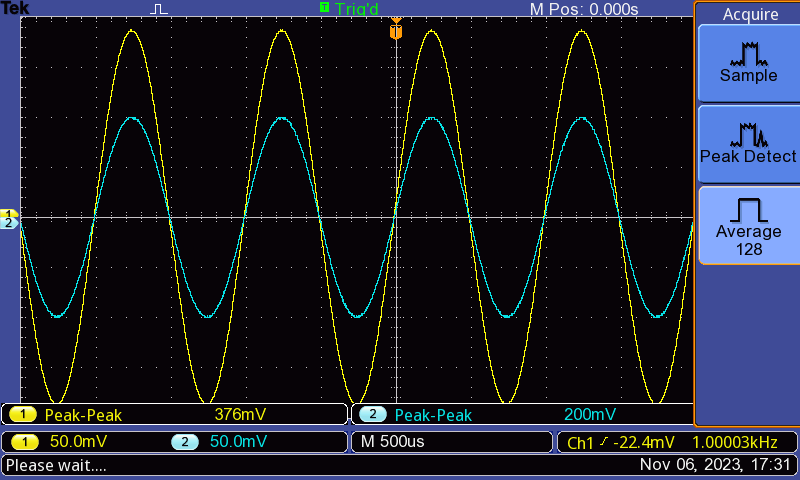


In [6]:
#dati versione2 verifica non invertente

v_in_ni = [0.2, 0.504, 0.804, 1.1, 1.41, 1.72, 2.02]
v_out_ni = [0.376, 0.936, 1.5, 2.06, 2.62, 3.16,3.7 ]
v_in_div_ni = [0.05, 0.1, 0.1, 0.2, 0.2, 0.5, 0.5]
v_out_div_ni = [0.05, 0.2, 0.2, 0.5, 0.5, 0.5, 0.5]



---



In [7]:
#dati amplificatore alle differenze

#onda sinusoidale in v2
ampiezza_d_2 = 1 #v_pp
f_d_2 = 200 #hz

#onda quadra in v1
ampiezza_d_1 = 2 #v_pp // abbassare a 1V nel caso di saturazione
f_d_1 = 50 #hz



cosa fare per la cella sopra

- Verificare quindi il funzionamento come amplificatore delle differenze: impostare l’onda
sinusoidale con ampiezza $1 V_{PP}$ e frequenza $200 Hz$ in $V_2$. Collegare l’altro canale del
generatore a $V_1$ e impostare un’onda quadra di ampiezza $2 V_{PP}$ (ev. abbassare a $1V$ se
andasse in saturazione) e frequenza $50 Hz$.
- Misurare gli input ($V_1$ e $V_2$) e l’output ($V_{out}$) nei punti di interesse per verificare la corretta
risposta del circuito, confrontando i dati raccolti con la simulazione e le previsioni teoriche.

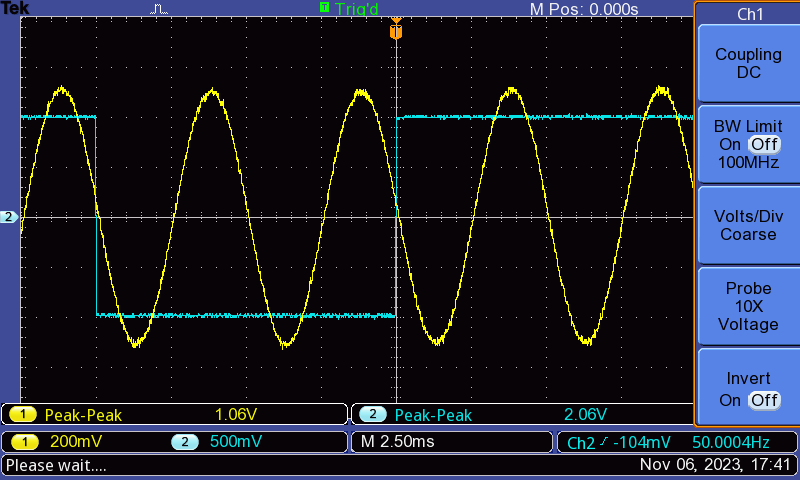

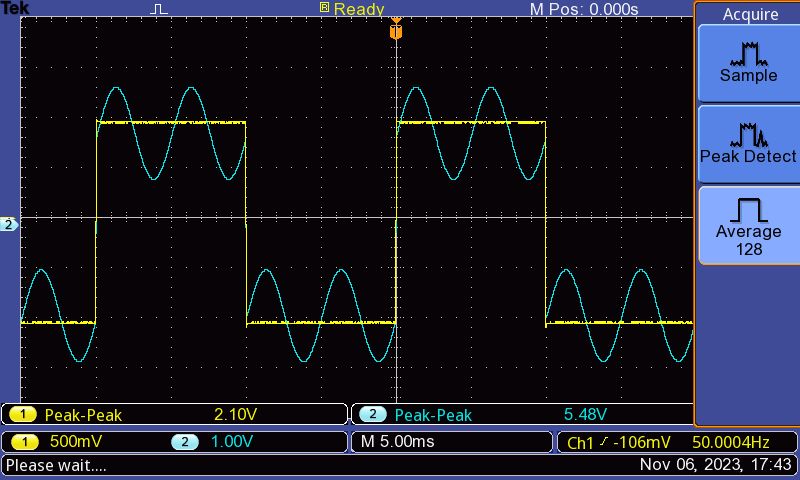



---



In [8]:
#dati amplificazione di modo comune Ac
#stesso segnale sinusoidale in V1 e V2

frequenza_ac = 500 #[hz] seno
v_in_ac = [ 0.416, 0.620, 0.8, 0.97, 1.2, 1.41, 1.6]
v_out_ac = [ 0.12, 0.175, 0.236, 0.29, 0.35, 0.42, 0.47]
v_in_div_ac = [ 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]
v_out_div_ac = [ 0.05, 0.05, 0.05, 0.05, 0.05, 0.1, 0.1]

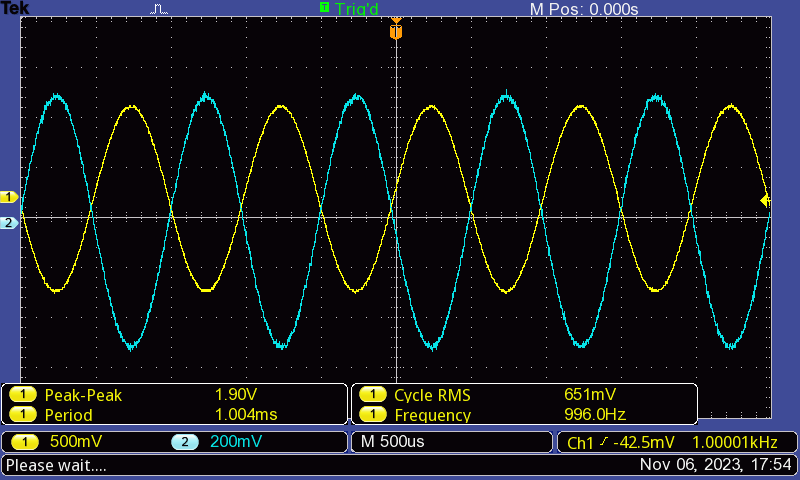



---



In [9]:
#dati amplificatore differenziale Ad
#misura di A1
#questa è la misura del punto 1 però con V2 a massa e segnale in V1

frequenza_ad = 1 #[khz] seno
v_in_ad = [ 0.20, 0.508, 0.804, 1.1, 1.4, 1.7, 2.02]
v_out_ad = [ 0.37, 0.92, 1.48, 2.02, 2.58, 3.14, 3.66]
v_in_div_ad = [ 0.05, 0.1, 0.1, 0.2, 0.2, 0.2, 0.5]
v_out_div_ad = [ 0.05, 0.2, 0.2, 0.5, 0.5, 0.5, 0.5]

#Analisi

**Verifica configurazione non invertente**

(Misura di $A_2$)

Nelle slide sugli amplificatori, alle slide 64-65 la formula per il guadagno teorico di un amplificazione non-invertente è dato da:

$G = 1 + \frac{R_f}{R_1}$

Dato che nel testo di laboratorio ci viene detto che questo valore di amplificazione dovrebbe essere uguale a quello di $A_d$ possiamo intuire che la formula per $A$ sia uguale e che quindi quella riportata sopra non sia quella da utilizzare in questo caso

Corretta con presa dati v_2

In [21]:
#calcolo del guadagno teorico
g_teorico = R_f / R_1
err_gteorico = g_teorico * math.sqrt( (err_R_f/(R_f*1000))**2 + (err_R_1/(R_1*1000))**2 )
print(g_teorico, " \pm ", err_gteorico)

1.8237454100367199  \pm  0.0027216567345887733


In [10]:
#calcolo degli errori
err_v_in_ni = []
err_v_out_ni = []
for i in range(len(v_out_ni)):
  dummy = 0
  dummy = math.sqrt( ((1/10)*v_out_div_ni[i])**2 + ((3/100)*v_out_ni[i])**2)
  err_v_out_ni.append(dummy)

for i in range(len(v_in_ni)):
  dummy = 0
  dummy = math.sqrt( ((1/10)*v_in_div_ni[i])**2 + ((3/100)*v_in_ni[i])**2 )
  err_v_in_ni.append(dummy)

print("err_v_in_ni")
print(err_v_in_ni, "\n")
print("err_v_out_ni")
print(err_v_out_ni)

err_v_in_ni
[0.007810249675906655, 0.01812772462279809, 0.026110810021904723, 0.03858756276314948, 0.046789849326536626, 0.07185095684818679, 0.07856436851397712] 

err_v_out_ni
[0.012338492614578169, 0.03447443110480578, 0.04924428900898052, 0.07949364754494538, 0.09315556880831119, 0.10717760960200597, 0.12174152947946729]


In [ ]:
#regressione lineare
regrlin_pear_errpost_xys(v_in_ni, v_out_ni, err_v_out_ni)

pendenza $b$	 1.8446749719727098
$\sigma_b$	 0.03496079039878962
intercetta $a$	 0.00761670400742398
$\sigma_a$	 0.01585316980763792
Coefficiente di Pearson $\rho_{xy}$	 0.9999055913363184
$\sigma_{\rho_{xy}}$	 0.006145053528935513
Errore a posteriori $\delta$	 0.02155385643980235


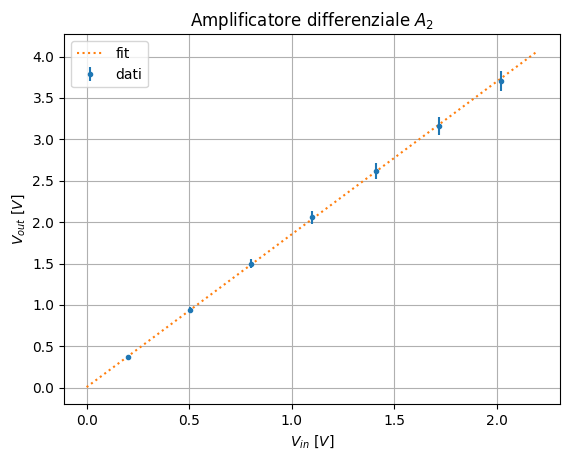

In [ ]:
plt.errorbar(v_in_ni, v_out_ni, marker=".", linestyle="", yerr=err_v_out_ni, label="dati")
plt.grid()
plt.title("Amplificatore differenziale $A_2$")
plt.xlabel("$V_{in} \\ [V]$")
plt.ylabel("$V_{out} \\ [V]$")
plt.plot(np.linspace(0,2.2,30), retta_fit_xba(np.linspace(0,2.2,30), 1.8446749719727098, 0.00761670400742398), marker="", linestyle=":", label="fit")
plt.legend()

se assumiamo che il parametro di fit $b$ come fattore di amplificazione del circuito ritroviamo un grave problema dato che esso è minore di $1$



---



**Amplificatore DELLE differenze**

In [ ]:
#misure in [V]
V_in_sin = 1.06
V_in_sin_err = 0.2
V_in_qua = 2.06
V_in_qua_err = 0.5
V_out = 5.48
V_out_err = 1



---



**Amplificatore di modo comune**

L'analisi è stata svolta intuendo quale fosse il procedimento da seguire

In [11]:
#calcolo degli errori
err_v_in_ac = []
err_v_out_ac = []
for i in range(len(v_out_ac)):
  dummy = 0
  dummy = math.sqrt( ((1/10)*v_out_div_ac[i])**2 + ((3/100)*v_out_ac[i])**2)
  err_v_out_ac.append(dummy)

for i in range(len(v_in_ac)):
  dummy = 0
  dummy = math.sqrt( ((1/10)*v_in_div_ac[i])**2 + ((3/100)*v_in_ac[i])**2 )
  err_v_in_ac.append(dummy)

print("err_v_in_ac")
print( err_v_in_ac,"\n")
print("err_v_out_ac")
print(err_v_out_ac)

err_v_in_ac
[0.02357435895204788, 0.027312268305653416, 0.03124099870362662, 0.035310196827545444, 0.041182520563948, 0.046789849326536626, 0.052000000000000005] 

err_v_out_ac
[0.006161168720299746, 0.00725, 0.008667548673067836, 0.010034440691936946, 0.011629703349613007, 0.016086018774078316, 0.017286121600868138]


In [ ]:
#regressione lineare
regrlin_pear_errpost_xys(v_in_ac, v_out_ac, err_v_out_ac)

pendenza $b$	 0.2996900724797622
$\sigma_b$	 0.010329753319520735
intercetta $a$	 -0.005989961061714455
$\sigma_a$	 0.008521618839581665
Coefficiente di Pearson $\rho_{xy}$	 0.9995173197782699
$\sigma_{\rho_{xy}}$	 0.013893361459803933
Errore a posteriori $\delta$	 0.004365302531167332


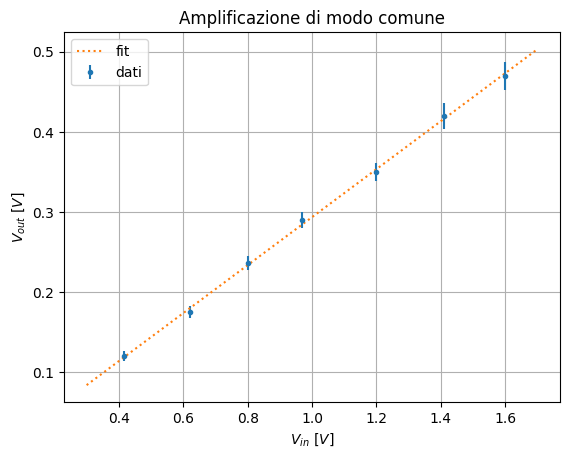

In [ ]:
plt.errorbar(v_in_ac, v_out_ac, marker=".", linestyle="", yerr=err_v_out_ac, label="dati")
plt.grid()
plt.title("Amplificazione di modo comune")
plt.xlabel("$V_{in} \\ [V]$")
plt.ylabel("$V_{out} \\ [V]$")
plt.plot(np.linspace(0.3,1.7,30), retta_fit_xba(np.linspace(0.3,1.7,30), 0.2996900724797622, -0.005989961061714455), marker="", linestyle=":", label="fit")
plt.legend()

Se assumiamo come $b$ il fattore di amplificazione $A_c$ e guardiamo le slide sugli amplificatori operazionali alla pagina 79 allora vediamo che minore è il valore di $A_c$ meglio è il risultato dell'esperienza, in quanto si avvicina all'approsimazione teorica



---



**Amplificatore ALLE differenze**

(Misura di $A_1$)

Nelle slide sugli amplificatori operazionali alla pagina 83 troviamo che

$A_d = \frac{R_f}{R_1}$

In [22]:
#calcolo del guadagno teorico
g_teorico = R_f / R_1
err_gteorico = g_teorico * math.sqrt( (err_R_f/(R_f*1000))**2 + (err_R_1/(R_1*1000))**2 )
print(g_teorico, " \pm ", err_gteorico)

1.8237454100367199  \pm  0.0027216567345887733


In [12]:
#calcolo degli errori
err_v_in_ad = []
err_v_out_ad = []
for i in range(len(v_out_ad)):
  dummy = 0
  dummy = math.sqrt( ((1/10)*v_out_div_ad[i])**2 + ((3/100)*v_out_ad[i])**2)
  err_v_out_ad.append(dummy)

for i in range(len(v_in_ad)):
  dummy = 0
  dummy = math.sqrt( ((1/10)*v_in_div_ad[i])**2 + ((3/100)*v_in_ad[i])**2 )
  err_v_in_ad.append(dummy)

print("err_v_in_ad")
print( err_v_in_ad,"\n")
print("err_v_out_ad")
print(err_v_out_ad)

err_v_in_ad
[0.007810249675906655, 0.018227934605983206, 0.026110810021904723, 0.03858756276314948, 0.04651881339845203, 0.054781383699209346, 0.07856436851397712] 

err_v_out_ad
[0.012174152947946727, 0.0340846006284363, 0.04869661179178691, 0.07856436851397712, 0.09214532001138202, 0.10664726906958284, 0.12064841482588985]


In [ ]:
#regressione lineare
regrlin_pear_errpost_xys(v_in_ad, v_out_ad, err_v_out_ad)

pendenza $b$	 1.829089432055525
$\sigma_b$	 0.03475197727766844
intercetta $a$	 0.003325187135139629
$\sigma_a$	 0.015690890487253254
Coefficiente di Pearson $\rho_{xy}$	 0.9998451334959377
$\sigma_{\rho_{xy}}$	 0.007870311613785779
Errore a posteriori $\delta$	 0.023073665457348354


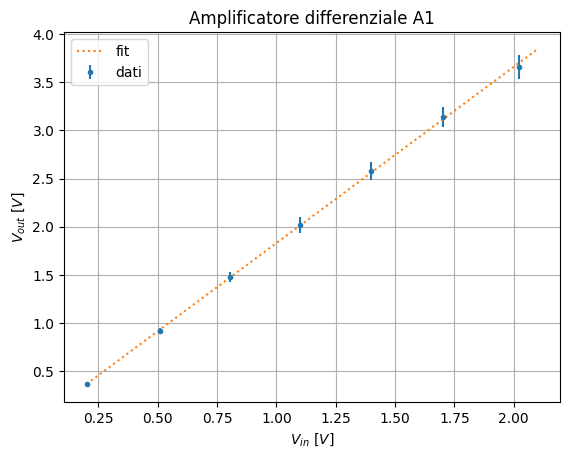

In [ ]:
plt.errorbar(v_in_ad, v_out_ad, marker=".", linestyle="", yerr=err_v_out_ad, label="dati")
plt.grid()
plt.title("Amplificatore differenziale $A_1$")
plt.xlabel("$V_{in} \\ [V]$")
plt.ylabel("$V_{out} \\ [V]$")
plt.plot(np.linspace(0.2,2.1,30), retta_fit_xba(np.linspace(0.2,2.1,30), 1.829089432055525, 0.003325187135139629), marker="", linestyle=":", label="fit")
plt.legend()



---



**$A_D$ come media e calcolo di $CMRR$**

Nelle slide sugli amplificatori operazionali, alla pagina 79 troviamo la seguente formula:

$CMRR = 20*\log(\frac{| A_D |}{| A_C |})$

In [14]:
ac = 0.2996900724797622
err_ac = 0.010329753319520735
ad_mediato = 0.010329753319520735
ad_1 = 1.829089432055525
err_ad_1 = 0.03475197727766844
ad_2 = 1.8446749719727098
err_ad_2 = 0.03496079039878962
ad_mediato = (ad_1 + ad_2)/2
err_ad_mediato = math.sqrt( (0.5*err_ad_1)**2 + (0.5*err_ad_2)**2 )
print("$A_D media$ \n", ad_mediato, " \pm " , err_ad_mediato)
cmrr = 20*math.log10( ad_mediato / ac )
err_cmrr = ( 20/((ad_mediato / ac)*math.log(10)) ) * ((ad_mediato / ac)*math.sqrt( (err_ad_mediato/ad_mediato)**2 + (err_ac/ac)**2 ))
print("$CMRR$ \n", cmrr, " \pm ", err_cmrr)

$A_D media$ 
 1.8368822020141176  \pm  0.024647295947099773
$CMRR$ 
 15.748178988599587  \pm  0.3212715743898491
